### 라이브러리 임포트

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 문제 정의(EDA 참조)
# 2. 데이터 수집
* 1) 데이터 불러오기(학습 데이터, 테스트 데이터)
  데이터 분석 단계에서 생성한 농구 선수 포지션 예측하기의 학습 데이터 및 테스트 데이터를 로드함.

In [2]:
train = pd.read_csv('data/csv/basketball_train.csv')
test = pd.read_csv('data/csv/basketball_test.csv')

* 2) 데이터 전처리

# 3. 모델 구현
### - SVM 최적의 파라미터 찾기
* 1. C(cost, 비용)
* 2. gamma

## - sklearn에서 제공하는 GridSearchCV를 사용하면, 손쉽게 최적의 C, gamma를 구할 수 있다.

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

def svc_param_selection(X, y, nfolds): #훈련데이터, 훈련데이터의 정답데이터, 교차검증의 등분
    #GridSearchCV는 C, gamma를 구할 수 있도록 내부에서는 교차검증을 이용하고 있음
    svm_parameters = [ #리스트에 딕셔너리로 데이터를 담도록 함 / 데이터를 전달받는 타입이 딕셔너리임
                        {'kernel':['rbf'], 
                         'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
                         'C':[0.01, 0.1, 1, 10, 100, 1000]
                        } #kernel에는 rbf알고리즘을 적용하겠다고 리스트로 셋팅 / 6개의 값 중에서 최적의 감마를 선택하도록 하는 것 +)cost도 동일하게 셋팅!!
                          #파라미터로 셋팅된 감마와 cost값은 일반적으로 svm에서는 지금의 범주의 데이터 셋에 대한 최적의 파라메타 값들로 들어오게 된다.
                     ] 
    
    ###중요코드###
    #기본적인 값들을 딕셔너리 변수에 담아서 이알고리즘을 적용해서 값들을 하나하나씩 넣어서 최적의 값을 찾아달라고 GridSearchCV에게 요청
    #GridSearchCV를 통해서 감마와 코스트의 값을 뽑아내도록 할 것임
    clf = GridSearchCV(SVC(), svm_parameters, cv=nfolds) #모듈을 먼저 임포트해줘야 함
    #적용할 알고리즘을 첫번째 매개변수로 셋팅해주면 됨 / 파라메타값들이 저장된 변수를 두번째 매개변수에 지정
    #cv(cross value가 교차검증(모든데이터를 검증용으로 사용)으로 생각): 몇 개로 등분할지에 대한 정보를 알려주면 됨_입력으로 전달받도록 함.
    
    #학습을 시키도록 한다.
    clf.fit(X, y) #최적의 모델 생성
    print(clf.best_params_) #best_params_필드는 학습하면서 찾은 최적의 감마와 cost값을 찾아준다.
    
    return clf #생성된 객체를 반환해주도록 한다.

In [4]:
X_train = train[['3P', 'BLK']] #두 개의 핏쳐를 가지고 학습을 시키도록 함.
y_train = train[['Pos']]

# 최적의 파라미터를 sklearn의 gridsearchcv를 통해 구하자.
clf = svc_param_selection(X_train, y_train.values.ravel(), 10) 
#결과값은 1차원으로 펼쳐줘야한다는 것을 유념하고 있어야 한다. (정답데이터.values.ravel())
#함수를 실행하고 나면 모델이 리턴될 것임. 이를 변수에 보관, best_params_은 최적의 감마와 cost를 알려주고 있음
#현재 모델의 값은 불변의 값이 아닌 데이터에 따라서 바뀔 수 있다.

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}


### 시각화
* 최적의 파라미터일 때의 결정경계와, 다른 파라미터들 일때의 결정경계를 비교해 본다.

In [5]:
# 시각화를 하기 위해, 최적의 C와 최적의 C를 비교하기 위한 다른 C를 후보로 저장한다.
C_candidates = []
C_candidates.append(clf.best_params_['C'] * 0.01) #0.001일 때 시각화
C_candidates.append(clf.best_params_['C']) #최적의 값일 때 시각화
C_candidates.append(clf.best_params_['C'] * 100) #cost값이 10일 때 결정경계 확인

# 시각화를 하기 위해, 최적의 gamma와 최적의 gamma를 비교하기 위한 다른 gamma를 후보로 저장한다.
# 최적의 감마값인 1일 때의 전 후값 감마의 결정 경계를 살펴보도록 한다.
gamma_candidates = []
gamma_candidates.append(clf.best_params_['gamma'] * 0.01)
gamma_candidates.append(clf.best_params_['gamma'])
gamma_candidates.append(clf.best_params_['gamma'] * 100)

C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\tjoeun\anaconda3\envs\tf_cpu\lib\site-packages\sklearn\base.py:439: UserWarning: 

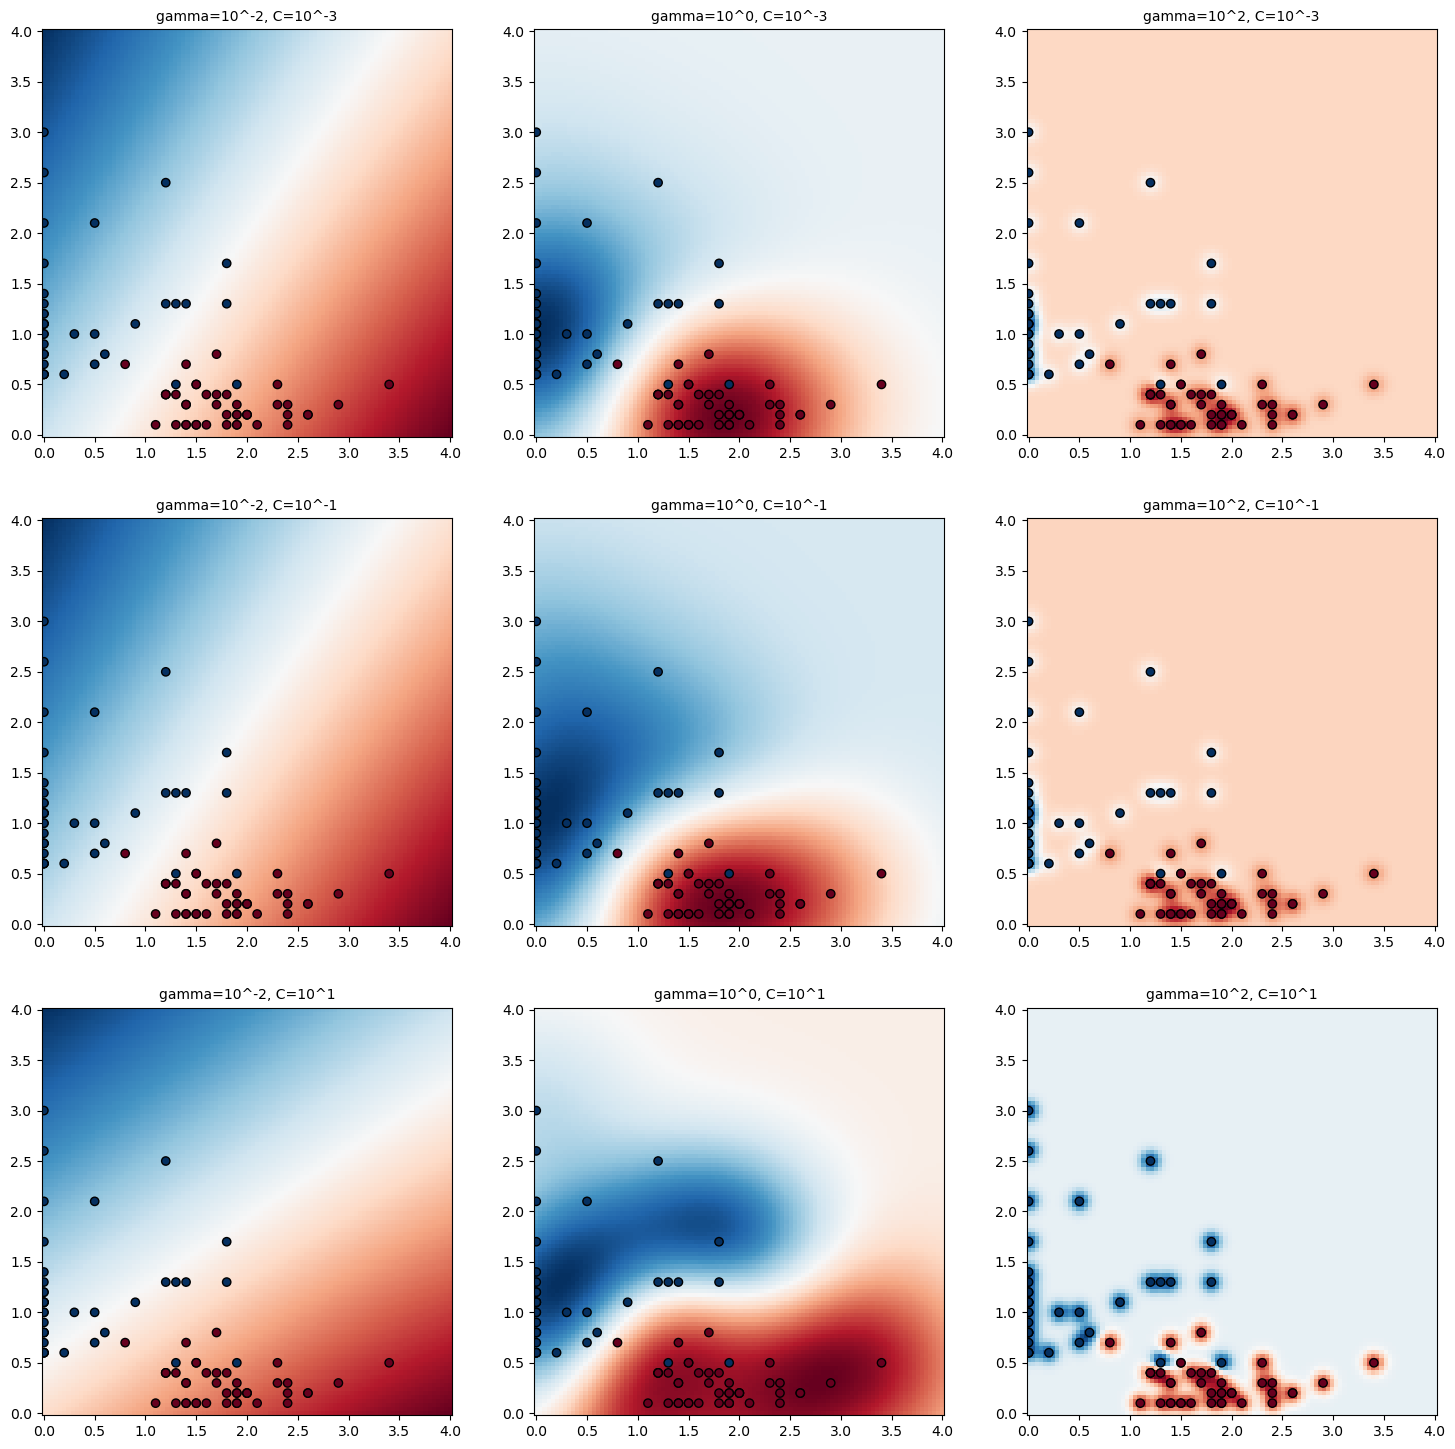

In [6]:
X = train[['3P', 'BLK']]
Y = train['Pos'].tolist() #알고리즘에 넣어줄 때 정답데이터를 1차원배열로 변환을 해줬어야 했음
#여기서는 파이썬의 리스트 자료형으로 변환을 해서 데이터를 Y변수에 저장해주도록 함.

# 포지션에 해당하는 문자열 SG(슈팅가드)와 C(센터)를 벡터화한다.
position = [] 
for gt in Y: #Y -> 정답데이터
    if gt == 'C': #꺼내온 데이터가 센터면 0으로 값을 저장
        position.append(0)
    else: #그렇지 않으면 1로 값을 저장
        position.append(1)
#***문자열 데이터를 숫자로 범주화하도록 하는 것이다. / 결과값이 0과 1로 변환되어 저장됨
        
# 각각의 파라미터에 해당하는 SVM 모델을 만들어 classifiers에 저장. 
classifiers = [] 
for C in C_candidates: # 0.001, 0.1, 10이라는 세개의 값이 저장되어져 있음 (3번 반복)
    for gamma in gamma_candidates: # 0.1, 1, 100의 값을 반복하게 될 것임 (3번 반복)
        clf = SVC(C=C, gamma=gamma) #모델 생성
        #매개변수 중에 cost값을 저장할 수 있음. 처음 C값은 0.001 / gamma도 매개변수로 전달할 수 있는데 처음 gamma값은 0.1일 것임
        #그렇게 저장된 값들로 반복해서 모델을 생성하고, 학습을 시키고 classifiers변수에 튜플의 형태로 저장될 것이다.
        clf.fit(X, Y) #그렇게 코스트와 감마의 값으로 학습을 시키도록 함
        classifiers.append((C, gamma, clf)) #학습시킨 결과의 모델을 튜플의 형태로 데이터를 저장하도록 한다.
#총 9번 반복하게 될 것이다. => 9개의 모델 생성!!        


# 18, 18, 사이즈의 차트를 구성한다.
plt.figure(figsize=(18, 18)) #사이즈를 줄여서 9개의 모델을 시각화하여 출력하도록 한다.
xx, yy = np.meshgrid(np.linspace(0, 4, 100), np.linspace(0, 4, 100))
#넘파이에서 제공해주는 meshgrid함수를 이용하면 
#이때 입력의 매개변수로 넘파이의 linspace함수(0~4범위를 균등하게 백등분을 해서 데이터를 리턴해주게 될 것임)를 넣어주도록 한다.
#그렇게 되면 1-4범위에서 100개의 데이터가 첫번째 매개변수로 전달되어질 것이다.
#그 값이 x축이 될 것임!! y축도 동일하게 코드를 작성해주면 된다.
#즉, 시각화해서 보여줄 x, y축에 대한 크기를 잡아주고 있는 것이다. => 그렇게 객체 데이터를 리턴 받아서 xx, yy변수에 보관하도록 한다.


# 각각의 모델들에 대한 결정 경계 함수를 적용하여 시각화. (9개의 모델에 대한 각각의 시각화를 반복문을 활용해서 코드 구성)
for (k, (C, gamma, clf)) in enumerate(classifiers): 
    #enumerate을 통해서 모델을 꺼내오도록 하는데 enumerate의 특징은 자동으로 인덱스값도 리턴을 해줌
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) #meshgrid같은 경우 2차원배열 값을 .ravel함수를 불러주면 벡터로 변환해줌
    #decision_function 결정경계의 함수 => np.c_(경계값을 담아주고 있는 벡터를 넣어주도록 한다.) 최종적으로 2차원의 데이터로 리턴해서 반환해줌
    Z = Z.reshape(xx.shape) #shape의 형태를 변환해주도록 한다. => 결정함수에서 반환된 배열의 형태를 통일 시켜주도록 하는 것임
    
    # 최적의 모델을 포함한 다른 파라미터로 학습된 모델들을 시각화.
    plt.subplot(len(C_candidates), len(gamma_candidates), k + 1) #0부터 순차적으로 값을 넣어줌  
    #한꺼번에 출력을 해주고자 할 때는 출력될 영역을 확보하도록 함 -> 그 영역은 subplot기능으로 배분하도록 함
    #subplot은 인덱스가 1부터 시작함. 그렇기 때문에 k + 1로 지정
    plt.title('gamma=10^%d, C=10^%d' % (np.log10(gamma), np.log10(C)),
                size='medium')
    
    # 서포트 벡터와 결정경계를 시각화.
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu) #색을 부여하는데 레드와 블루로 넣음.
    plt.scatter(X['3P'], X['BLK'], c=position, cmap=plt.cm.RdBu_r, 
                edgecolors='k') #9개 영역에 잡혀진 설정의 정보를 시각화
    #기존 프로그래밍에서는 규칙성을 개발자가 찾았어야 했다면 현재는 머신알고리즘이 찾아줌 

# 4. 테스트 단계
* 최적의 모델을 생성했다면 모델의 정확도를 확인하도록 한다.
* sklearn의 GridSearchCV()로 얻어진 최적의 파라미터로 학습된 clf를 이용하여, 테스트 진행.

In [7]:
from sklearn.metrics import classification_report

#테스트에 사용할 데이터 로드.
X_test = test[['3P', 'BLK']]
y_test = test[['Pos']]

y_pred = clf.predict(X_test) #예측하여 추출한 20개의 데이터를 응답해줄 것임

print(classification_report(y_test, y_pred)) #정답데이터, 예측한 결과에 데이터
#f1-score: 95%로 20개 데이터 중에 한개가 틀렸다는 정보를 보여줌
#성능평가의 지표를 보여주는 메소드임.

              precision    recall  f1-score   support

           C       1.00      0.91      0.95        11
          SG       0.90      1.00      0.95         9

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



In [8]:
#모델이 예측한 데이터와 실제 파일에 저장된 저장 데이터를 눈으로 직접확인하는 코드
comparison = pd.DataFrame({'prediction':y_pred, 'answer':y_test.values.ravel()})
comparison #11번의 데이터 하나만 잘못 판별하고 있음

,prediction,answer
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [ ]:
#머신러닝 알고리즘에서 knn, svm, 의사결정 트리가 대표적인 지도학습과 관련된 알고리즘이다. => 특히 분류개념의 알고리즘으로 제공되어짐
#군집화와 주성분분석은 대표적인 비지도학습임!!
#데이터 분석과 관련해서는 한줄 한줄의 코드가 어떤 명령을 내리고 있는지를 이해하는 것이 중요하다.

#[서포트 벡터머신(SVM)]
#분류를 위한 지도학습(정답을 가르쳐주면서 학습시키는 것) 머신러닝 알고리즘 
#장점은 예측을 정확하게 해주는 것임. SVM에서는 어떤 아이디어로 분류하는 예측 모델인지

#[서포트 벡터머신의 핵심 용어]
#경계결정(Decision Boundary), 서포트 벡터(support vector), 마진(margin)은 혼용되면서 많이 사용되기 때문에 알고 있어야 한다.
# --> 마진의 값을 최대로 만들어주는 결정 경계를 찾는 것이 이 알고리즘의 핵심임

#서울시에 어딘지 모르는 위치에 서있을 때, 강북과 강남의 분류에서 내가 서있는 위치를 판단하고자 함. 
#SVM의 핵심은 나에게 질문한 사람한테 거꾸로 물어보겠다는 것임. 지금 한강이 어딨냐고 물어봄
#남쪽에 한강이 있다고 답변한다면 강북에 있다고 판단하면 됨
#데이터의 분류의 판단을 결정하는 것을 한강으로 찾겠다는 것임. 그 때 한강의 선을 결정경계라고 한다.
#SVM의 최종목표는 결정경계를 찾는 것임!! 강북과 강남을 분류할 수 있는 선을 찾도록 하는 것!!
#결정경계를 찾고 그 결정경계를 이루는 가장 가까이에 있는 각각의 데이터들을 벡터(1차원적인 값뿐만 아니라 방향성까지 고려됨)라고 한다.
#결정경계(특정영역에 붙으면 좋지 않음)에서 가장 가까이에 있는 데이터를 서포트 벡터라고 함.
#결정경계가 어느쪽에 위치하는 것이 올바른지를 시각적으로는 확인할 수 있지만 이론적으로 증명하기 어려움 이때, 수식으로 증명에 대한 설명하고 있는 것이 SVM
#결정경계에 근접한 서포트벡터를 찾고, 결정경계와 거리를 계산. 이때 거리값을 마진이라고 함.
#마진의 값이 최대가 되어지는 점(동시에 최대가 되는 선)을 직선으로 잡았을 때 최적의 결정경계를 찾을 수 있음.
#SVM의 단점은 차원이 4개부터는 시각적으로 표현하기 어렵다는 것임 / 차원이 많아질수록 결정경계를 만들어내는 것이 불가능하거나 어렵다는 것
#정확도를 높여주기 위한 파라메타가 존재함. -> 마진의 값을 최대로 가지는 수식을 증명하는 과정에서 수식에 등장하는 변수값들이 존재 

#1차원일 때는 점으로 2차원일 때는 선으로 3차원일때는 면으로 결정경계를 찾도록 함.
#결정경계는 N차원의 경계라할 때 N - 1차원으로 경계가 만들어짐.

#1차원상에서 분류할 수 없는 데이터일 경우 2차원 공간으로 옮겨보도록 함 (y = x제곱) -> 결정경계로 나눌 수 있음!! 
#2차원의 데이터를 경계로 나눌 수 없을 때 커널트릭을 도입하면서 3차원함수에 집어넣어서 매핑을 시키도록 함 -> 면으로 경계를 세움
#(현재의 차원에서 경계선을 찾을 수 없을 때 저차원의 공간데이터를 고차원의 공간데이터로 옮겨서 데이터를 분류하는 것을 커널트릭 / 이때 데이터를 옮겨주는 함수를 매핑함수)
#하나의 차원으로만 옮긴다는 개념이 아님. 2차원이 3차원으로 옮겼을 때도 경계가 나타나지 않는다면 4차원으로 옮겼을때 경계가 나올 수 있음.
#어떠한 차원이든 저차원에서 고차원으로 옮기면 결정경계를 만들 수 있다는 전제조건을 가짐.


#핏쳐가 하나면 1차원, 두개면 2차원, 세개면 3차원임, 그 이상은 다(N)차원
#데이터수집 -> 데이터 특징 파악하는 EDA과정 _ 데이터 분포도 시각화(데이터들의 경계가 명확해야 분류알고리즘 적용 가능) 

#SVM는 cost비용파라메타, gamma라는 표준편차 조절의파라메타로 값을 튜닝하면서 높은 정확도를 가져갈 수 있는 모델을 조절해갈 수 있다.

#학습데이터에서는 경계에 따른 결과가 최적이지만 실제에서는 최적이 아님. 훈련용 데이터에 최적화되어있을 때 과대적합이라고 한다.
#오류에 범위에 의한 경계선을 가지게 되면 실제로 서비스되는 모델에서 과대적합되는 것임
#실제로 서비스를 할 때는 학습데이터에 최적화되어진 모델이 아니라 범용적으로 만들어진 모델을 사용해야 함.
#과대적합이 되지 않도록 하는 것이 중요한데 svm에서는 오차를 cost값을 통해서 튜닝할 수 있도록 한다.
#cost는 마진의 너비를 조정할 수 있도록 하는 것이다. 서포트백터의 대상에서 근접한 대상으로 찾아가는 것임.

#c값을 크게 하면 의미가 이론(오차를 적용하지 않은 것처럼)에 가깝게 조절, c값을 작게해줄수록 오류의 허용범위를 넓게 잡아주게 된다.
#c값을 작게하면 좋다고 오해할 수 있음. c값(오차범위 허용)을 많이해주게 되면 과소 적합 문제(충분히 학습이 이루어지지 않은 상태)가 발생
#데이터 특성에 따라서 c값은 다 다름. 다양한 c값을 적용해가면서 현재 내가 사용하는 학습데이터에 최적화되어진 c값을 찾는 것이 중요함.



#무한한 차원으로 변환 -> RBF (svm은 범용적인 사용을 위해 rbf알고리즘으로 적용되어져 있음)
#rbf에서는 감마라는 파라메타가 등장함 -> 현재 차원의 데이터를 고차원으로 옮겨가는 것인데 엄밀히 말하면 데이터의 변형이 이루어지는 것임
#커널의 벡터(데이터포인트)의 표준편차(분산_데이터의 퍼짐의 정도에 루트)를 튜님을 하면서 고차원으로 옮겨가는 것
#즉, 데이터포인트에 가중치를 부여하는 것이 감마파라메타라고 할 수 있다. ==> 어떠한 변화가 이루어지느냐.
#감마가 0일때는 거의 선이고, 표준편차를 크게 할수록 선에서 곡선의 형태로 데이터 포인터들을 근접해간다!!
#감마값이 근접하게 되면 감마값은 무조건 클 수록 좋은 것이 아님. 과대적합이 발생함(훈련데이터에 최적화됨)
#***일반데이터에 최적화된 모델을 만드는 것이 적절한 것임.(범용적인 값을 잘 맞추는 것)*** 감마도 최적의 값이 다 다양한 것이다.
#원래 하나하나 값을 넣어서 감마값을 찾아가야하는데 사이킷런이 최적의 값을 찾을 수 있도록 기능을 제공해주고 있음


#장점: 핏쳐의 특징이 아무리 많아도 분류하는데에 높은 정확도를 보여줌. / 예측속도 빠름, 과대 과소 적합에 대처 / 딥러닝만큼의 정확도를 보여줌
#단점: 전처리가 상당히 중요(오차를 일으킬 수 있는 데이터를 제거해줄수록 좋음)

######################################################################################################################################


#knn도 분류알고리즘이였고 지도학습이였음. 
# => knn은 내 데이터를 기준으로 거리로 봤을 때 가장 가까이에 있는 k값을 찾아서 갯수에 따라서 어떤부류인지를 예측하는 것이였음
#    최적의 k값을 찾을 수 있도록 사이킷런에서는 k-ford 교차 검증을 활용했음. k분의 1만큼을 검증데이터로 사용하고 나머지 데이터를 학습하도록 함

#군집화 주성분 분석이 비지도학습 파트임
#선형회귀(머신러닝부터 시작해서 딥러닝까지를 커버하는 알고리즘), 로지스틱회귀, 딥러닝 --> 텐서플로우 라이브러리 활용

#파라메타 값에 따라서 머신러닝, 딥러닝의 알고리즘의 정확도를 높여갈 수 있음. -> 하이퍼파라메타라고 칭해주고 있음
#즉, 알고리즘마다 정확도를 높여줄 수 있게끔 값을 튜닝해줄 수 있는 것들은 클래스나 메소드를 호출하면서 전달해줄 수 있는 
#    파라메타로 정의된 값이고, 이것을 하이퍼 파라메타라고 칭하는 것임 

#==> knn에서는 k값이였음.(일반적으로 3이상 홀수의 값으로, 범위는 전체 주어진 데이터 갯수의 반정도 되어지는 값까지의 범위에서 
#    현재 분석하고자하는 데이터셋에서 교차검증을 통해 최적의 k값을 빠르게 찾아갈 수 있도록 사이킷런이 기능을 제공함)
# ***튜닝해줄 수 있는 하이퍼파라메타를 찾는것이 중요***


In [9]:
#분류모델(분류가 두 가지(최소 2개 최대 n개를 가질 수 있음.) 중에 한가지를 선택해줘야 하는 경우)에 대한 성능평가는 혼동행렬이 많이 활용됨
#성능을 svm, knn에서 어느정도의 정확도를 가져가는지 판단했음 -> 정확도라는 것이 어떻게 계산이 된 것인지를 살펴볼 예정

#기준은 행을 실제 정답으로 담아주고 있음 모델이 예측한 예측값을 열로 잡았음
#실제 데이터에서는 일반환자가 있고(N) 암환자가 있음.(Y)
#아무것도 모르는 상태에서 진찰을 받으러옴. 
#병원에 진단을 해주는 AI가 있는데 검사데이터를 보면서 암환자인지 아닌지를 예측하는 알고리즘으로 작동됨
#진찰을 받으러왔는데 일반환자였는데 머신러닝알고리즘이 암환자가 아니라고 판단함(N(일반), Y(암))

#관심사를 positive로 설정하는 것. 예측에 포커스를 맞추고 있는 것이다.
#암에 포커스를 맞췄을 때 맞췄으면 True/Positive ==> 정답
#일반환자의 ai가 검사결과를 보고 예측하기를 일반환자라고 예측하면 true/Negative ==> 정답
#실제 암환자였는데 일반환자로 예측함 false/Negative ==> 거짓
#일반환자였는데 암환자로 예측함 false/positive ==> 거짓

#정확도(전체 갯수에서 맞춘것)를 어떻게 계산하느냐? 맞춘것을 분자로 두고, 틀린것과 맞춘것을 분모로 둠
#A병원 - 60 + 30 + 1 + 9 분(왼오왼오)의 60 + 9 ==> 69%가 나옴 / 100 분의 69 ==> 69%
#B병원 - 70 + 20 + 9 + 1 분의 70 + 1 ==> 71%가 나옴
#이부분이 정확도의 맹점임. B병원은 일반인을 맞추는 정확도만 큼. 관심사인 포지션 암의 오진률이 높음.
#이때 그 판단을 어떻게 할 수 있을지에 대한 성능 평가가 정밀도, 재현율의 개념이 추가적으로 설명이 되어지는 것임.

#재현율은 암환자맞춘비율 + 암환자틀린비율(FN) 분의 암환자맞춘비율 => 개념은 같음 FN이 커지면 재현율이 작아짐
#이때 값이 작아진다는 것은 암환자인데 일반환자로 오진한 것

#정밀도는 식을 보면 모델이 얼마나 정확하게 맞추고 있는지를 확인하는 것임. 정확도보다도 정밀도의 데이터가 중요한 것임.
#오진값(일반환자를 암환자로 오진한 비율)이 커지면 커질수록 정밀도 값이 작아짐. 이환자로 놓고보면 일반환자가 암환자로 치료받게됨.

#이를 계산해보면 A병원이 정밀도와 재현율이 높게 나옴.